## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
total_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice = total_data['Mouse ID'].nunique()

In [4]:
total_data.shape

(1893, 8)

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = total_data.duplicated(subset=['Mouse ID', 'Timepoint'])

duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False)

clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].nunique()
total_mice


249

In [9]:
clean_df.shape

(1883, 8)

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
stdev_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tvolume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumorv_summary = pd.DataFrame({
    "Tumor Volume Mean (mm3)": mean_tvolume,
    "Tumor Volume Median (mm3)": median_tvolume,
    "Tumor Volume Standard Deviation": stdev_tvolume,
    "Tumor Volume Standard Error": sem_tvolume})
tumorv_summary

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.458254,50.854632,6.637293,0.540135
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [12]:
#Create dataframe to hold mice per drug trial
mice_perdrug = clean_df.groupby(['Drug Regimen'])['Mouse ID'].nunique()
mice_perdrug_summary = pd.DataFrame({"Mice in trial": mice_perdrug})
mice_perdrug_summary


,Mice in trial
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


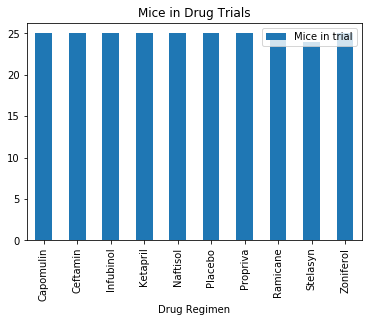

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pandas_bar = mice_perdrug_summary.plot(kind='bar', title="Mice in Drug Trials")
pandas_bar


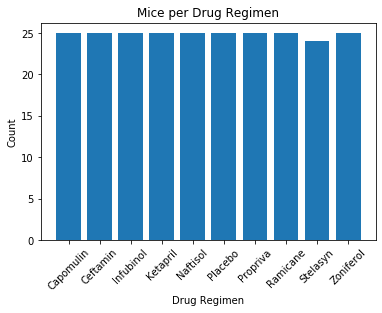

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#set x axis
x_axis_bar = np.arange(len(mice_perdrug))

#set tick locations
tick_loc_bar = [value for value in x_axis_bar]

#create bar
plt.bar(x_axis_bar, mice_perdrug)
plt.xticks(tick_loc_bar, list(mice_perdrug.index), rotation = 45)

#title and labels
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#show
plt.show()

In [15]:
#Create dataframe to hold male and female counts
gender_count = clean_df['Sex'].value_counts()
gender_count

Male      958
Female    925
Name: Sex, dtype: int64

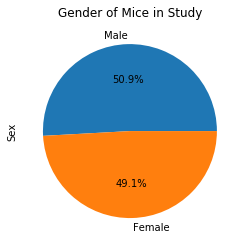

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind = 'pie', y = 'Sex', title = "Gender of Mice in Study", autopct = '%1.1f%%')
plt.show()


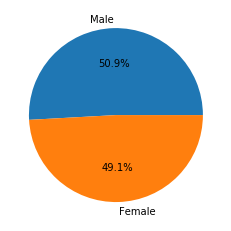

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create gender variable
gender = list(gender_count.index.values)

plt.pie(gender_count, labels=gender, autopct = '%1.1f%%')
#plt.title("Gender of Mice in Study")
#show
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_sort = clean_df.sort_values(['Timepoint'], ascending = True)
time_sort.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1077,k862,Stelasyn,Female,13,25,0,45.0,0
1087,k894,Zoniferol,Female,13,29,0,45.0,0
255,q610,Ramicane,Female,18,21,0,45.0,0
1097,l215,Propriva,Male,10,29,0,45.0,0


In [19]:
endpoint_tumor = time_sort.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep = 'last')

endpoint_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1163,l872,Placebo,Male,19,30,0,45.000000,0
1315,o848,Stelasyn,Female,14,27,0,45.000000,0
1216,n482,Propriva,Female,4,29,0,45.000000,0
938,h428,Ketapril,Female,1,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
360,g316,Capomulin,Female,22,22,45,40.159220,2
716,c766,Placebo,Female,13,26,45,69.823146,4
94,j913,Ramicane,Female,4,17,45,31.560470,1
1193,m550,Ketapril,Male,18,28,45,69.253503,4


In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(endpoint_tumor, clean_df, how="left", on=["Mouse ID", "Timepoint"])
tumor_merge

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,l872,Placebo,Male,19,30,0,45.000000,0,Placebo,Male,19,30,45.000000,0
1,o848,Stelasyn,Female,14,27,0,45.000000,0,Stelasyn,Female,14,27,45.000000,0
2,n482,Propriva,Female,4,29,0,45.000000,0,Propriva,Female,4,29,45.000000,0
3,h428,Ketapril,Female,1,27,0,45.000000,0,Ketapril,Female,1,27,45.000000,0
4,b447,Ceftamin,Male,2,30,0,45.000000,0,Ceftamin,Male,2,30,45.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,g316,Capomulin,Female,22,22,45,40.159220,2,Capomulin,Female,22,22,40.159220,2
245,c766,Placebo,Female,13,26,45,69.823146,4,Placebo,Female,13,26,69.823146,4
246,j913,Ramicane,Female,4,17,45,31.560470,1,Ramicane,Female,4,17,31.560470,1
247,m550,Ketapril,Male,18,28,45,69.253503,4,Ketapril,Male,18,28,69.253503,4


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = list(mice_perdrug.index)
treatment_list


    

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [37]:
drug_list = ['Capomulin',
'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []



In [39]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles = tumor_merge[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


KeyError: 'Capomulin'

In [ ]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [40]:
#Create capomulin df
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [55]:
#groupby for graph
capomulin_group = capomulin_df.groupby(['Timepoint'])
capomulin_mean = capomulin_group.mean()
capomulin_mean

,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,
0,14.040000,20.120000,45.000000,0.000000
5,14.040000,20.120000,44.266086,0.160000
10,14.040000,20.120000,43.084291,0.320000
15,13.666667,20.000000,42.064317,0.375000
20,13.304348,19.782609,40.716325,0.652174
25,13.181818,19.909091,39.939528,0.818182
30,13.181818,19.909091,38.769339,1.090909
35,13.181818,19.909091,37.816839,1.181818
40,12.809524,19.857143,36.958001,1.380952


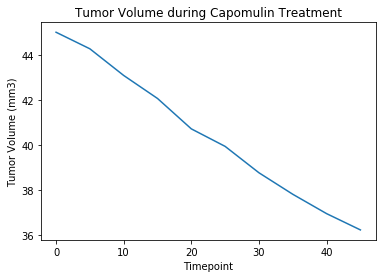

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis_line = list(capomulin_mean.index.values)
y_axis_line = capomulin_mean['Tumor Volume (mm3)']
plt.plot(x_axis_line, y_axis_line)
plt.title("Tumor Volume during Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


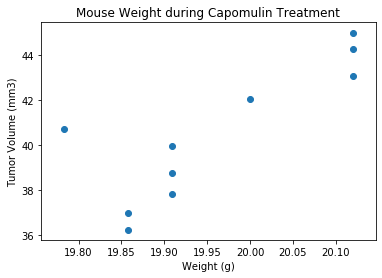

In [59]:

x_axis_scatter = capomulin_mean['Weight (g)']
y_axis_scatter = list(capomulin_mean['Tumor Volume (mm3)'])

plt.scatter(x_axis_scatter, y_axis_scatter)
plt.title("Mouse Weight during Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
